### 8. In the lab, a classifcation tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [13]:
import numpy as np 
import pandas as pd
from ISLP import load_data
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

##### (a) Split the data set into a training set and a test set.

In [6]:
df = load_data('Carseats')
x = pd.get_dummies(df.drop('Sales', axis=1))
y = df['Sales']
x_train, x_test, y_train, y_test = \
train_test_split(x, y)

##### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

6.166614999999999
[Text(0.6396769087099126, 0.9722222222222222, 'ShelveLoc_Good <= 0.5\nsquared_error = 7.739\nsamples = 300\nvalue = 7.493'), Text(0.40271387572886297, 0.9166666666666666, 'Price <= 105.5\nsquared_error = 5.681\nsamples = 235\nvalue = 6.765'), Text(0.1900054664723032, 0.8611111111111112, 'CompPrice <= 123.5\nsquared_error = 4.92\nsamples = 77\nvalue = 8.209'), Text(0.11907798833819241, 0.8055555555555556, 'Price <= 92.5\nsquared_error = 4.296\nsamples = 59\nvalue = 7.638'), Text(0.0575801749271137, 0.75, 'ShelveLoc_Bad <= 0.5\nsquared_error = 3.34\nsamples = 28\nvalue = 8.741'), Text(0.03935860058309038, 0.6944444444444444, 'Income <= 102.5\nsquared_error = 1.742\nsamples = 20\nvalue = 9.481'), Text(0.023323615160349854, 0.6388888888888888, 'Age <= 50.5\nsquared_error = 1.009\nsamples = 15\nvalue = 9.005'), Text(0.011661807580174927, 0.5833333333333334, 'Population <= 91.0\nsquared_error = 0.482\nsamples = 6\nvalue = 9.795'), Text(0.0058309037900874635, 0.5277777777777

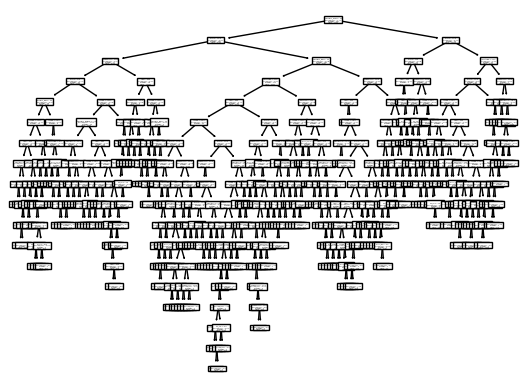

In [8]:
model = DecisionTreeRegressor().fit(x_train, y_train)
print(MSE(y_test, model.predict(x_test)))
print(plot_tree(model, feature_names=x_train.columns))

##### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [10]:
ccp_path = model.cost_complexity_pruning_path(x_train, y_train)
grid = GridSearchCV(model, {'ccp_alpha' : ccp_path.ccp_alphas}, cv=5, scoring='neg_mean_squared_error').fit(x_train, y_train)
MSE(y_test, grid.predict(x_test))

5.719180765344576

the mse improves

##### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

In [17]:
model = RandomForestRegressor(max_features=x_train.shape[1], n_estimators=500).fit(x_train, y_train)
print(MSE(y_test, model.predict(x_test)))
feature_importance = pd.DataFrame({'importance' : model.feature_importances_},
                                  index=x_train.columns).sort_values(by='importance', ascending=False)
feature_importance

2.3778767040960087


,importance
Price,0.307528
ShelveLoc_Good,0.244583
CompPrice,0.104952
Age,0.083243
Advertising,0.071714
Income,0.064848
Population,0.032468
Education,0.029892
ShelveLoc_Medium,0.026338
ShelveLoc_Bad,0.022215


##### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the efect of m, the number of variables considered at each split, on the error rate obtained.

In [18]:
model = RandomForestRegressor(max_features=np.sqrt(x_train.shape[1]).astype(int),
                               n_estimators=500).fit(x_train, y_train)
print(MSE(y_test, model.predict(x_test)))
feature_importance = pd.DataFrame({'importance' : model.feature_importances_},
                                  index=x_train.columns).sort_values(by='importance', ascending=False)
feature_importance

3.052091701578009


,importance
Price,0.214332
ShelveLoc_Good,0.144122
Age,0.107928
Income,0.096044
CompPrice,0.087266
Advertising,0.074614
Population,0.072710
ShelveLoc_Bad,0.071961
Education,0.050745
ShelveLoc_Medium,0.038848
